In [4]:
# upgrade tables bo read_hdf wymaga zaraz
!pip install --upgrade tables

     |████████████████████████████████| 4.3MB 2.8MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [0]:
import pandas as pd
import numpy as np

In [11]:
ls "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car"

data/  LICENSE  README.md


In [12]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car/data"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car/data


In [13]:
ls 

car.h5


In [16]:
df = pd.read_hdf('car.h5')
df.shape

(106494, 155)

In [17]:
df.sample(5)

,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,feature_kurtyny-powietrzne,feature_klimatyzacja-dwustrefowa,feature_światła-led,feature_czujnik-zmierzchu,feature_elektrycznie-ustawiane-lusterka,feature_asr-(kontrola-trakcji),feature_poduszka-powietrzna-kierowcy,feature_cd,feature_elektryczne-szyby-przednie,feature_poduszka-powietrzna-pasażera,feature_system-start-stop,feature_światła-do-jazdy-dziennej,feature_komputer-pokładowy,feature_elektryczne-szyby-tylne,feature_klimatyzacja-manualna,feature_tapicerka-welurowa,feature_czujnik-deszczu,feature_światła-przeciwmgielne,feature_ogrzewanie-postojowe,feature_radio-niefabryczne,feature_regulowane-zawieszenie,feature_ogranicznik-prędkości,feature_zmieniarka-cd,feature_szyberdach,feature_isofix,feature_asystent-pasa-ruchu,feature_alufelgi,feature_bluetooth,feature_nawigacja-gps,feature_asystent-parkowania,...,param_particle-filter,param_zarejestrowany-w-polsce,param_oferta-od,param_moc,param_make,param_kraj-pochodzenia,param_engine-power,param_year,param_serwisowany-w-aso,param_rodzaj-paliwa,param_możliwość-finansowania,param_registered-in-poland,param_transmission,param_miesięczna-rata,param_kod-silnika,param_version,param_opłata-początkowa,param_model-pojazdu,param_pojemność-skokowa,param_kierownica-po-prawej-(anglik),param_fuel-type,param_vat-free,param_acrylic,param_damaged,param_door-count,param_tuning,param_filtr-cząstek-stałych,param_nr-of-seats,param_kolor,param_engine-capacity,param_pearl,param_stan,param_wersja,param_emisja-co2,param_body-type,param_matowy,param_bezwypadkowy,param_akryl-(niemetalizowany),param_monthly-payment-value,car_id
95096,"[Osobowe, Ford, Fiesta, Ford Fiesta Mk6 (2002-...","22:17, 1 marca 2018",PLN,Cena Brutto,5900.0,"Szczecin, Zachodniopomorskie, Śródmieście",None,Osoba prywatna,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,None,Tak,Osoby prywatnej,68 KM,None,Polska,None,None,None,Diesel,None,None,None,None,None,None,None,Fiesta,1 399 cm3,None,None,None,None,None,None,None,None,None,Czerwony,None,None,Używane,Mk6 (2002-2008),None,None,None,None,None,None,95096
46778,"[Osobowe, Škoda, RAPID]","16:14, 3 marca 2018",PLN,"Cena Brutto, Faktura VAT",29900.0,"ul. Budowlanych 7 - 62-081 Baranowo, gm. Tarno...",AUTOPARK - DEALER SAMOCHODÓW UŻYWANYCH Z GWARA...,Dealer,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,None,Tak,Firmy,86 KM,None,Polska,None,None,Tak,Benzyna,Tak,None,None,None,None,None,None,RAPID,1 197 cm3,None,None,None,None,None,None,None,None,None,Srebrny,None,None,Używane,None,None,None,None,Tak,None,None,46778
141296,"[Osobowe, Opel, Astra, Opel Astra H (2004-2014)]","15:36, 28 lutego 2018",PLN,"Cena Brutto, Do negocjacji",11900.0,"Gliwicka 135A - 43-190 Mikołów, Śmiłowice (Pol...",AUTO-HIT AUTORYZOWANY PARTNER VIP-GWARANT SERVICE,Dealer,False,False,False,False,False,False,True,False,True,True,True,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,...,None,None,Firmy,105 KM,None,None,None,None,None,Benzyna,Tak,None,None,None,None,None,None,Astra,1 600 cm3,None,None,None,None,None,None,None,None,None,Inny kolor,None,None,Używane,H (2004-2014),4 g/km,None,None,Tak,None,None,141296
156270,"[Osobowe, Citroën, C4 Cactus]","16:05, 1 marca 2018",PLN,"Cena Brutto, Faktura VAT",63900.0,"KRACZKOWA 1440 - 37-124 Rzeszów, Podkarpackie ...",AUTO CENTER RZESZÓW Sp. z o.o.,Dealer,False,False,True,False,True,True,True,True,True,False,True,True,True,True,True,False,False,False,True,True,False,False,False,True,False,False,True,False,True,True,True,False,...,None,None,Firmy

In [18]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

In [19]:
np.mean(df["price_value"])

47534.13743703866

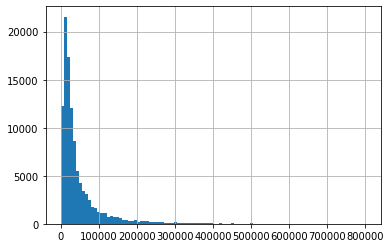

In [20]:
df['price_value'].hist(bins=100)

In [21]:
df.price_value.value_counts()

19900.0     1417
16900.0     1224
9900.0      1224
15900.0     1209
14900.0     1186
            ... 
53740.0        1
7550.0         1
247730.0       1
182200.0       1
114690.0       1
Name: price_value, Length: 7821, dtype: int64

In [22]:
df.param_uszkodzony.value_counts()

Tak    4250
Name: param_uszkodzony, dtype: int64

In [23]:
df.param_model.count()

83

In [24]:
df.param_gearbox.value_counts()

Manualna                                 53
Automatyczna hydrauliczna (klasyczna)    15
Automatyczna dwusprzęgłowa (DCT, DSG)     5
Półautomatyczna (ASG, Tiptronic)          2
Automatyczna bezstopniowa (CVT)           2
Name: param_gearbox, dtype: int64

In [26]:
df.feature_bluetooth.value_counts()

False    63621
True     42873
Name: feature_bluetooth, dtype: int64

In [27]:
df["param_rodzaj-paliwa"].value_counts()

Diesel         53925
Benzyna        46780
Benzyna+LPG     4820
Hybryda          636
Elektryczny       80
Benzyna+CNG       60
Etanol             1
Name: param_rodzaj-paliwa, dtype: int64

In [28]:
df.param_przebieg.value_counts()

1 km          4047
5 km          2889
10 km         1123
180 000 km     878
190 000 km     841
              ... 
258 251 km       1
73 749 km        1
166 160 km       1
131 310 km       1
265 442 km       1
Name: param_przebieg, Length: 23954, dtype: int64

In [29]:
df.param_przebieg.dtype
# obiekt

dtype('O')

In [0]:
df[df['param_przebieg'].isna() == False].param_przebieg.map(lambda x: int(str(x).replace("km","").replace(" ", "")))

0              1
2         209533
3          30500
4         129500
5          29100
           ...  
160609     88000
160610    129000
160611    276000
160614    299999
160615    187000
Name: param_przebieg, Length: 106057, dtype: int64

In [0]:
#udało się zamienić na liczby:
df['param_przebieg_int'] = df['param_przebieg'].map(lambda x: int(str(x).replace("km","").replace(" ", "")) if x else 0).astype(int)

In [56]:
df[['param_przebieg', 'param_przebieg_int']].dtypes

param_przebieg        object
param_przebieg_int     int64
dtype: object

In [57]:
df.price_currency.value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [58]:
df.price_details.value_counts()

Cena Brutto, Do negocjacji                                                    49422
Cena Brutto                                                                   29148
Cena Brutto, Faktura VAT                                                      13781
Cena Brutto, Do negocjacji, Faktura VAT                                        7528
Cena Netto, Faktura VAT                                                        2828
Cena Netto, Do negocjacji, Faktura VAT                                         2277
Cena Netto                                                                      716
Cena Netto, Do negocjacji                                                       685
Brutto                                        , Do negocjacji                    51
Brutto                                                                           27
Brutto                    , Faktura VAT                    , Do negocjacji       10
Brutto                    , Faktura VAT                                     